## Importing Libraries

In [29]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

## Loading Audio File

In [30]:
sample_rate, audio_data = wavfile.read('./Audio/Original_Password.wav')

## Setting Filter Parameters

In [31]:
cutoff_frequency = 2000  
filter_order = 6         
filter_type = 'high'  

## Setting Butterworth Filter

In [32]:
nyquist = 0.5 * sample_rate
normal_cutoff = cutoff_frequency / nyquist
b, a = butter(filter_order, normal_cutoff, btype=filter_type, analog=False)

## Applying Filter

In [33]:
filtered_audio_data = lfilter(b, a, audio_data)

## Plotting Original and Filtered Signals

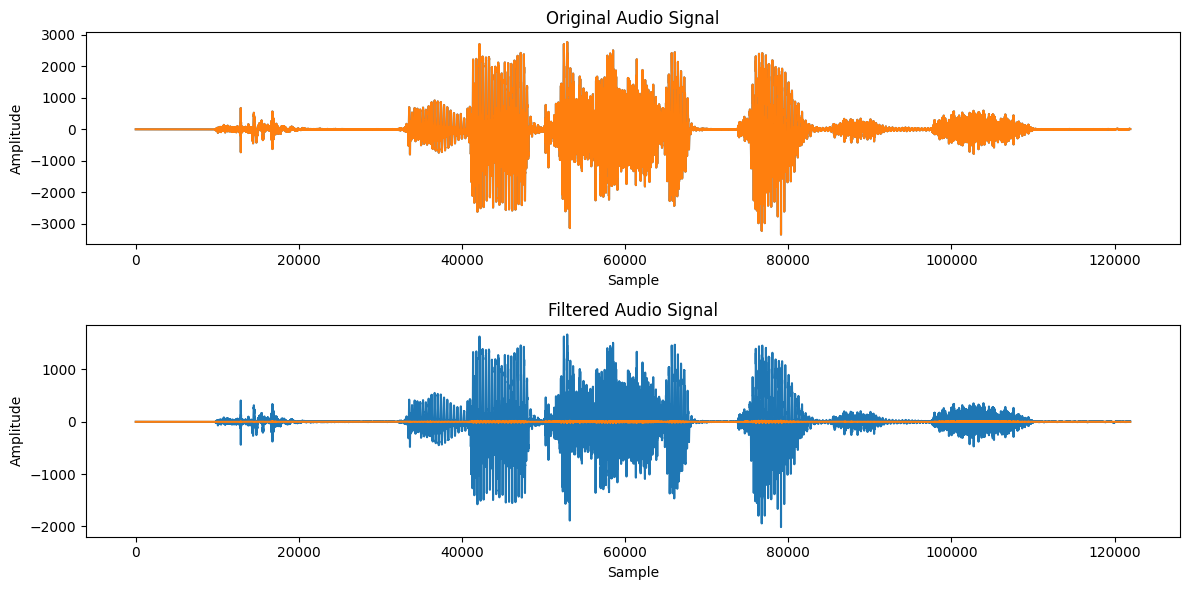

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Original Audio Signal')
plt.plot(audio_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.title('Filtered Audio Signal')
plt.plot(filtered_audio_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Saving Filtered Signal

In [35]:
wavfile.write('./Audio/filtered_audio.wav', sample_rate, np.int16(filtered_audio_data))

## Loading Filtered Signal

In [36]:
sample_rate, audio_data = wavfile.read('./Audio/filtered_audio.wav')

## Plotting Filtered Signal in Time Domain

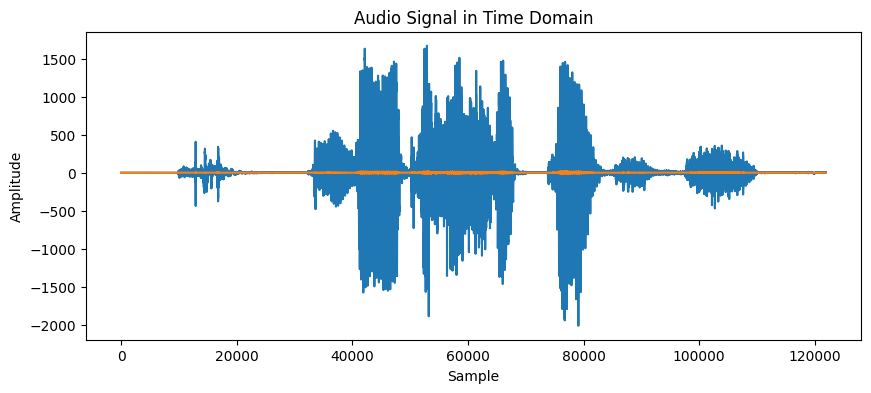

In [37]:
plt.figure(figsize=(10, 4))
plt.title('Audio Signal in Time Domain')
plt.plot(audio_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

## Applying DFT

In [38]:
X = np.fft.fft(audio_data)

## Storing the Magintude Spectrum

In [39]:
magnitude_spectrum = np.abs(X)

## Getting frequency axis

In [40]:
frequency_axis = np.fft.fftfreq(len(X), 1 / sample_rate)

## Plotting Magnitude Spectrum

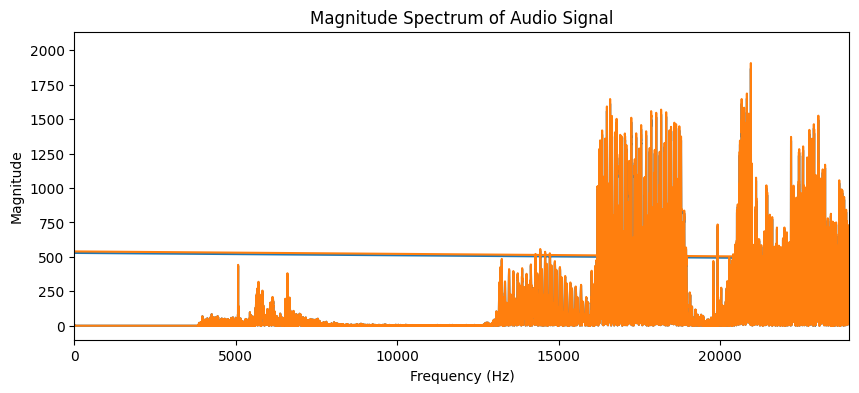

In [41]:
plt.figure(figsize=(10, 4))
plt.title('Magnitude Spectrum of Audio Signal')
plt.plot(frequency_axis, magnitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate / 2)  
plt.show()